### Air Safety


### Aim of the study
This data shows incidens of airplains and can be used as monitoring tool for different companies and their quality. I will use this data to check whether some of the companies have more critical rate of incidents as quality control issue.

### Features

##### airline: Airline (asterisk indicates that regional subsidiaries are included)


##### avail_seat_km_per_week:	Available seat kilometers flown every week


##### incidents_85_99:	Total number of incidents, 1985–1999


##### fatal_accidents_85_99:	Total number of fatal accidents, 1985–1999


##### fatalities_85_99:	Total number of fatalities, 1985–1999


##### incidents_00_14:	Total number of incidents, 2000–2014


##### fatal_accidents_00_14:	Total number of fatal accidents, 2000–2014


##### fatalities_00_14:	Total number of fatalities, 2000–2014


In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn
#import stats library from numpy
from scipy import stats
#these are the ploting moduls and libraries we will use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#command so that plots appear in iPython Notebook
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
airline=pd.read_csv('airline-safety.csv')
airline.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


Here we want to normalize the number of accidents per one bilion of kilometers per person seated:

In [6]:
airline['seat_KM_per_week_in_billions']=airline['avail_seat_km_per_week']/1000000000

In [7]:
airline['seat_KM_per_week_in_billions'].describe()

count    56.000000
mean      1.384621
std       1.465317
min       0.259373
25%       0.474036
50%       0.802909
75%       1.847239
max       7.139291
Name: seat_KM_per_week_in_billions, dtype: float64

In [8]:
for column in airline.columns[2:-1]:
    new_column_name=str(column) + '_per_bilionKM'
    airline[new_column_name]=airline[column]/airline['seat_KM_per_week_in_billions']

We select features with accidents

In [9]:
airline_for_heatmap=airline.iloc[:,8:]

In [10]:
airline_for_heatmap.head()

,seat_KM_per_week_in_billions,incidents_85_99_per_bilionKM,fatal_accidents_85_99_per_bilionKM,fatalities_85_99_per_bilionKM,incidents_00_14_per_bilionKM,fatal_accidents_00_14_per_bilionKM,fatalities_00_14_per_bilionKM
0,0.320907,6.232340,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.197672,63.456422,11.689341,106.873974,5.009718,0.834953,73.475857
2,0.385804,15.551952,0.000000,0.000000,2.591992,0.000000,0.000000
3,0.596872,5.026205,1.675402,107.225703,8.377008,0.000000,0.000000
4,1.865254,1.072240,0.000000,0.000000,1.072240,0.000000,0.000000


We see that number of incidents and fatalities are in very different range which is expected, so we will, after making a rate of fatalites per bilion of KM, also make standardisation of features (min max scaler), from 0 to 1. We see that Aviancka and Pakistan have the highest fatality rate.

In [11]:
airline_for_heatmap=airline_for_heatmap.apply(lambda x:round(x,2))

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'incidents_85_99_per_bilionKM'),
  Text(1.5, 0, 'fatal_accidents_85_99_per_bilionKM'),
  Text(2.5, 0, 'fatalities_85_99_per_bilionKM')])

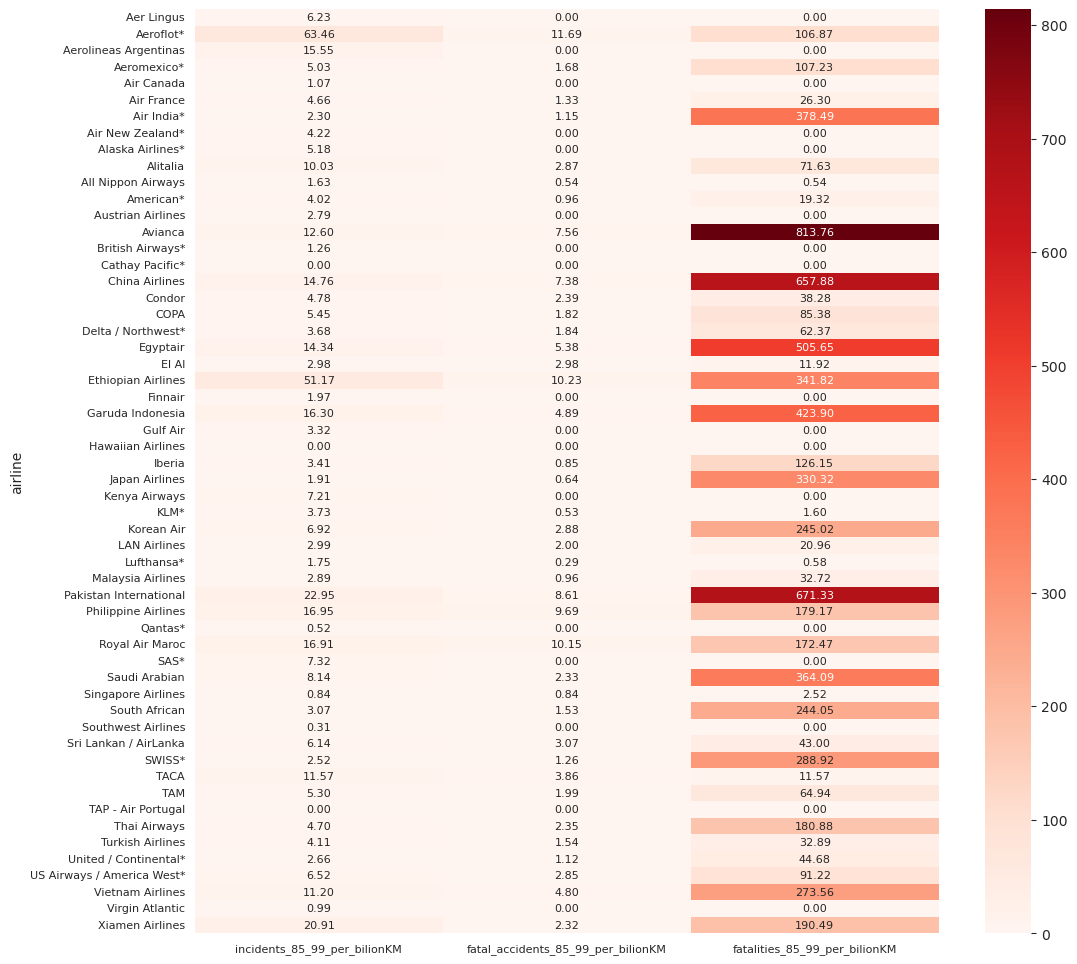

In [23]:
plt.figure(figsize=(12,12))
airline_for_heatmap.index=airline['airline']
sns.heatmap(airline_for_heatmap[['incidents_85_99_per_bilionKM', 'fatal_accidents_85_99_per_bilionKM', 'fatalities_85_99_per_bilionKM']], annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='Reds')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)


Let'make the same heatmap for later time frame (2000 - 2014). Some of the companies with highest number of fatalities do not appear in later framework, maybe due to some quality interventions. Kenia is appearing as company with high number of fatalites in later period (it is a company that started flying more in later time period)

In [33]:
airline_for_heatmap['seat_KM_per_week_in_billions'].sort_values()

airline
TACA                          0.26
Kenya Airways                 0.28
Royal Air Maroc               0.30
Gulf Air                      0.30
Aer Lingus                    0.32
Sri Lankan / AirLanka         0.33
El Al                         0.34
Pakistan International        0.35
Austrian Airlines             0.36
Aerolineas Argentinas         0.39
Avianca                       0.40
Philippine Airlines           0.41
Condor                        0.42
Xiamen Airlines               0.43
Ethiopian Airlines            0.49
Hawaiian Airlines             0.49
Finnair                       0.51
COPA                          0.55
Egyptair                      0.56
Aeromexico*                   0.60
Garuda Indonesia              0.61
TAP - Air Portugal            0.62
Vietnam Airlines              0.63
South African                 0.65
SAS*                          0.68
Alitalia                      0.70
Air New Zealand*              0.71
SWISS*                        0.79
China Airlin

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'incidents_00_14_per_bilionKM'),
  Text(1.5, 0, 'fatal_accidents_00_14_per_bilionKM'),
  Text(2.5, 0, 'fatalities_00_14_per_bilionKM')])

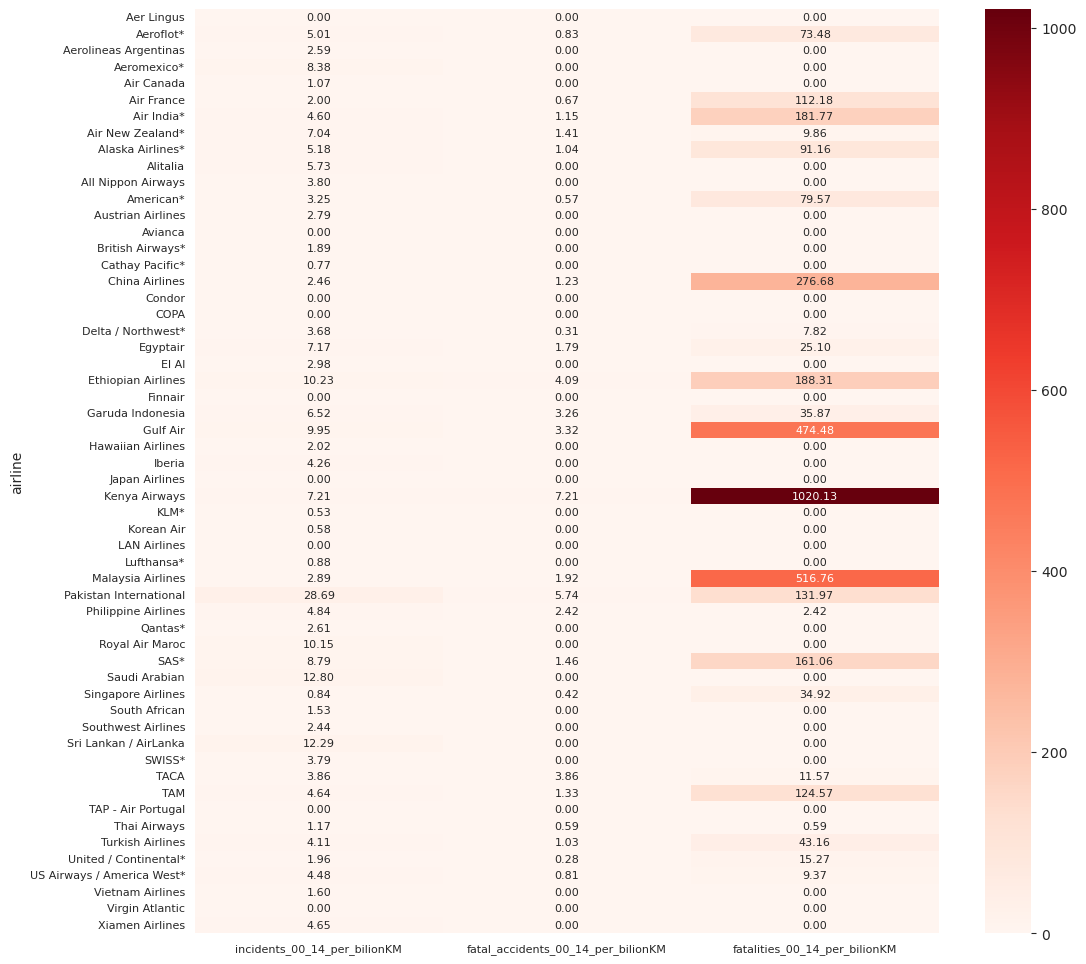

In [25]:
plt.figure(figsize=(12,12))
airline_for_heatmap.index=airline['airline']
sns.heatmap(airline_for_heatmap[['incidents_00_14_per_bilionKM', 'fatal_accidents_00_14_per_bilionKM','fatalities_00_14_per_bilionKM']], annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='Reds')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

Let's compare just incidents from both time period. We seem that companies from first time period improved their safety, but there appeared a new companies that have severe number of fatalities that did not fly so much in first time period. 

In [34]:
airline_for_heatmap.columns

Index(['seat_KM_per_week_in_billions', 'incidents_85_99_per_bilionKM',
       'fatal_accidents_85_99_per_bilionKM', 'fatalities_85_99_per_bilionKM',
       'incidents_00_14_per_bilionKM', 'fatal_accidents_00_14_per_bilionKM',
       'fatalities_00_14_per_bilionKM'],
      dtype='object')

(array([0.5, 1.5]),
 [Text(0.5, 0, 'fatalities_85_99_per_bilionKM'),
  Text(1.5, 0, 'fatalities_00_14_per_bilionKM')])

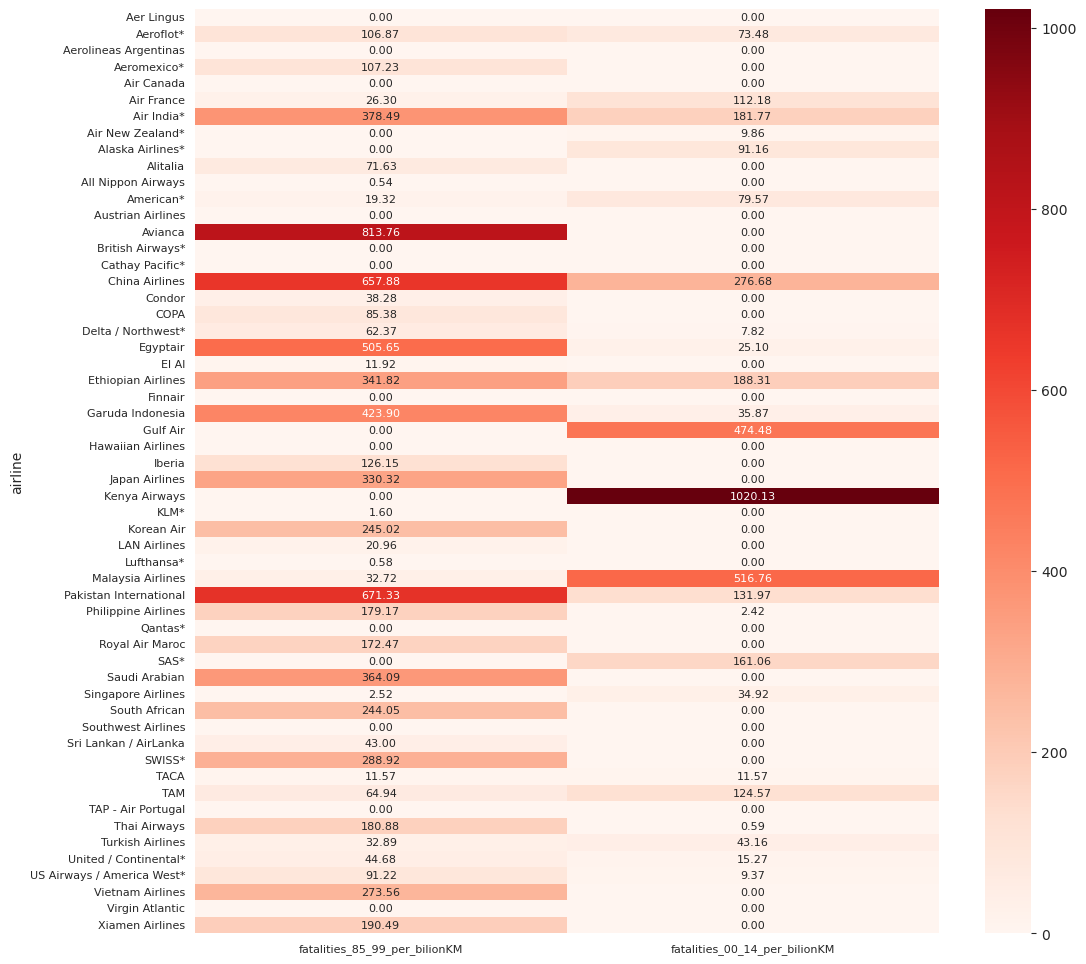

In [36]:
plt.figure(figsize=(12,12))
airline_for_heatmap.index=airline['airline']
sns.heatmap(airline_for_heatmap[['fatalities_85_99_per_bilionKM', 'fatalities_00_14_per_bilionKM']], annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='Reds')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

We now want to check the quality of indicators, how all of them are good measures of company safety and causalties. Assumption is that causalties are not just a matter of luck but also of safety policy measures. We want to put all the features on same scale and than compare them and correlate them. We will use Minimum Maximum standardisation, because we deal with events that are not normally distributed.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
airline.index=airline['airline']
airline=airline.drop(['airline'],axis=1)
airline.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,seat_KM_per_week_in_billions,incidents_85_99_per_bilionKM,fatal_accidents_85_99_per_bilionKM,fatalities_85_99_per_bilionKM,incidents_00_14_per_bilionKM,fatal_accidents_00_14_per_bilionKM,fatalities_00_14_per_bilionKM
airline,,,,,,,,,,,,,,
Aer Lingus,320906734,2,0,0,0,0,0,0.320907,6.232340,0.000000,0.000000,0.000000,0.000000,0.000000
Aeroflot*,1197672318,76,14,128,6,1,88,1.197672,63.456422,11.689341,106.873974,5.009718,0.834953,73.475857
Aerolineas Argentinas,385803648,6,0,0,1,0,0,0.385804,15.551952,0.000000,0.000000,2.591992,0.000000,0.000000
Aeromexico*,596871813,3,1,64,5,0,0,0.596872,5.026205,1.675402,107.225703,8.377008,0.000000,0.000000
Air Canada,1865253802,2,0,0,2,0,0,1.865254,1.072240,0.000000,0.000000,1.072240,0.000000,0.000000


In [42]:
scaler=MinMaxScaler()

In [63]:
airline.columns

Index(['avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99',
       'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14',
       'fatalities_00_14', 'seat_KM_per_week_in_billions',
       'incidents_85_99_per_bilionKM', 'fatal_accidents_85_99_per_bilionKM',
       'fatalities_85_99_per_bilionKM', 'incidents_00_14_per_bilionKM',
       'fatal_accidents_00_14_per_bilionKM', 'fatalities_00_14_per_bilionKM'],
      dtype='object')

In [43]:
columns_to_scale=['incidents_85_99_per_bilionKM', 'fatal_accidents_85_99_per_bilionKM',
       'fatalities_85_99_per_bilionKM', 'incidents_00_14_per_bilionKM',
       'fatal_accidents_00_14_per_bilionKM', 'fatalities_00_14_per_bilionKM']

In [44]:
airlane_scaled = airline[columns_to_scale]

In [45]:
airlane_scaled[columns_to_scale]=scaler.fit_transform(airlane_scaled[columns_to_scale])

/tmp/ipykernel_4623/894175089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlane_scaled[columns_to_scale]=scaler.fit_transform(airlane_scaled[columns_to_scale])


In [46]:
airlane_scaled.head()

,incidents_85_99_per_bilionKM,fatal_accidents_85_99_per_bilionKM,fatalities_85_99_per_bilionKM,incidents_00_14_per_bilionKM,fatal_accidents_00_14_per_bilionKM,fatalities_00_14_per_bilionKM
airline,,,,,,
Aer Lingus,0.098214,0.000000,0.000000,0.000000,0.000000,0.000000
Aeroflot*,1.000000,1.000000,0.131333,0.174620,0.115814,0.072026
Aerolineas Argentinas,0.245081,0.000000,0.000000,0.090347,0.000000,0.000000
Aeromexico*,0.079207,0.143327,0.131766,0.291992,0.000000,0.000000
Air Canada,0.016897,0.000000,0.000000,0.037374,0.000000,0.000000


In [52]:
correlation_matrix_85_99 = airlane_scaled[['incidents_85_99_per_bilionKM','fatal_accidents_85_99_per_bilionKM', 'fatalities_85_99_per_bilionKM']].corr()
correlation_matrix_00_14 = airlane_scaled[['incidents_00_14_per_bilionKM', 'fatal_accidents_00_14_per_bilionKM', 'fatalities_00_14_per_bilionKM']].corr()

We see that correlations are lower than expected, especailly that of incidents and fatalities, maybe this is due to the different number of passangers in airplain, or that some really minor issues are registred as incidents.

<Axes: >

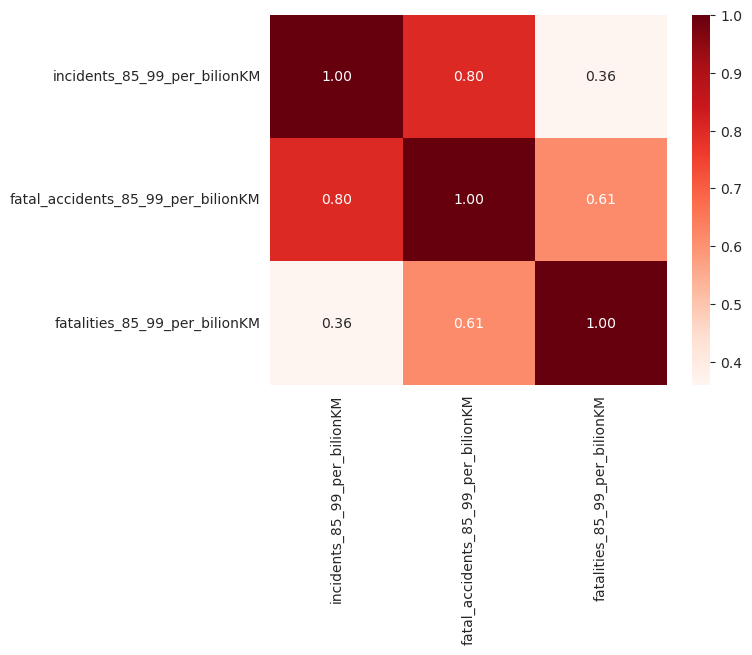

In [53]:
sns.heatmap(correlation_matrix_85_99, annot=True, fmt=".2f", cmap='Reds')

<Axes: >

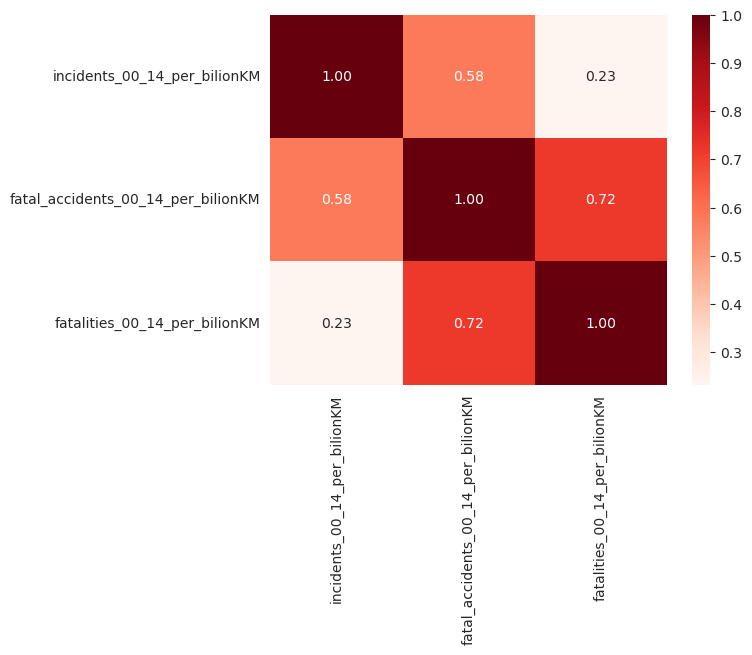

In [55]:
sns.heatmap(correlation_matrix_00_14, annot=True, fmt=".2f", cmap='Reds')

Let's as final make a new column that will represent the number of fatalities decreased due to different safety measures.

In [56]:
airline.columns

Index(['avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99',
       'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14',
       'fatalities_00_14', 'seat_KM_per_week_in_billions',
       'incidents_85_99_per_bilionKM', 'fatal_accidents_85_99_per_bilionKM',
       'fatalities_85_99_per_bilionKM', 'incidents_00_14_per_bilionKM',
       'fatal_accidents_00_14_per_bilionKM', 'fatalities_00_14_per_bilionKM'],
      dtype='object')

We see that all companies in general decreased the number of fatalities, expcept a couple of them (Kenyia, Gulf Air, Malesia) that started to flight more in recent years.

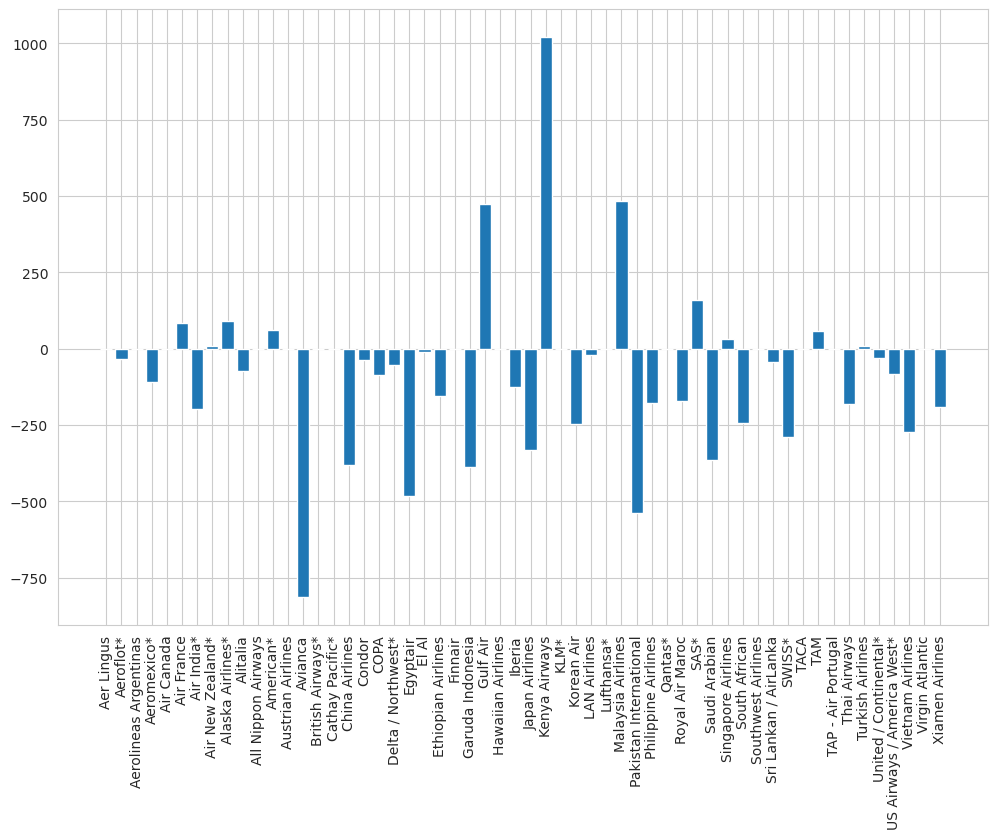

In [64]:
airline['difference in fatalities'] = airline['fatalities_00_14_per_bilionKM']- airline['fatalities_85_99_per_bilionKM']
plt.figure(figsize=(12,8))
plt.bar(airline.index, airline['difference in fatalities'])
plt.xticks(rotation=90)
plt.show()